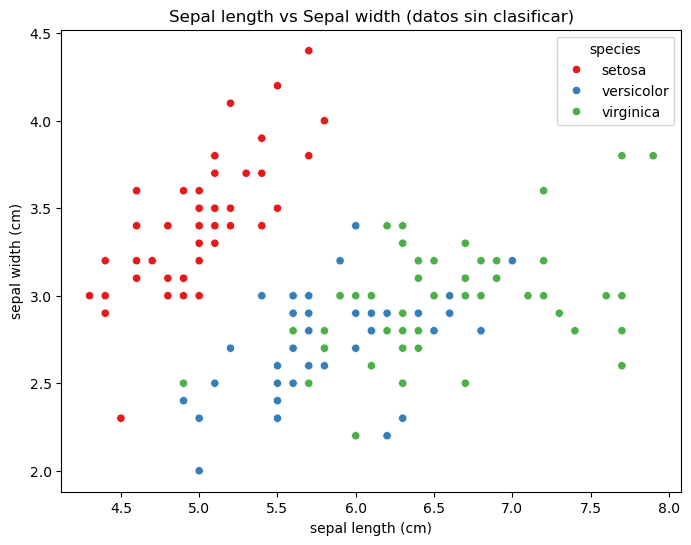

In [1]:
# Importamos las bibliotecas para traer e imprimir el dataset.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd

# Cargamos el dataset.
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = iris.target
df["species"] = df["species"].map({0:"setosa", 1:"versicolor", 2:"virginica"})

# Scatterplot con dos características (diagrama de dispersión).
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="sepal length (cm)",
    y="sepal width (cm)",
    hue="species",
    palette="Set1",
    data=df
)
plt.title("Sepal length vs Sepal width (datos sin clasificar)")
plt.show()

In [20]:
# Importamos de la biblioteca el dataset, el modelo y las métricas.
from sklearn.datasets import load_iris
from sklearn.svm import NuSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cargamos el dataset y preparamos los datos y etiquetas.
iris = load_iris()
x = iris.data
y = iris.target

# Mostramos la cantidad de muestras y las categorías que incluye el dataset.
print("Shape X:", x.shape, "Shape y:", y.shape, "\n")
print("Variables:", iris.feature_names, "\n")

# Dividimos la información para entrenar el modelo.
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.3, random_state = 42
)

# Creamos y entrenamos al modelo.
nusvc = NuSVC(nu=0.5, kernel="rbf", gamma="scale", random_state=42)
nusvc.fit(x_train, y_train)

# Probamos el modelo (Clasificación de flores).
y_pred = nusvc.predict(x_test)

# Aplicamos las métricas para medir el rendimiento del modelo.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'macro')
recall = recall_score(y_test, y_pred, average = 'macro')
f1 = f1_score(y_test, y_pred, average = 'macro')

# Imprimimos los resultados de las métricas.
print(f"Accuracy:  {accuracy: .4f}")
print(f"Precision: {precision: .4f}")
print(f"Recall:    {recall: .4f}")
print(f"F1:        {f1: .4f}")

Shape X: (150, 4) Shape y: (150,) 

Variables: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 

Accuracy:   1.0000
Precision:  1.0000
Recall:     1.0000
F1:         1.0000


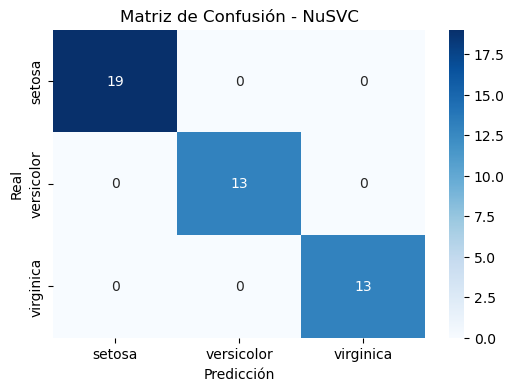

In [16]:
# Importamos las bibliotecas para crear la matriz de confución.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title("Matriz de Confusión - NuSVC")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

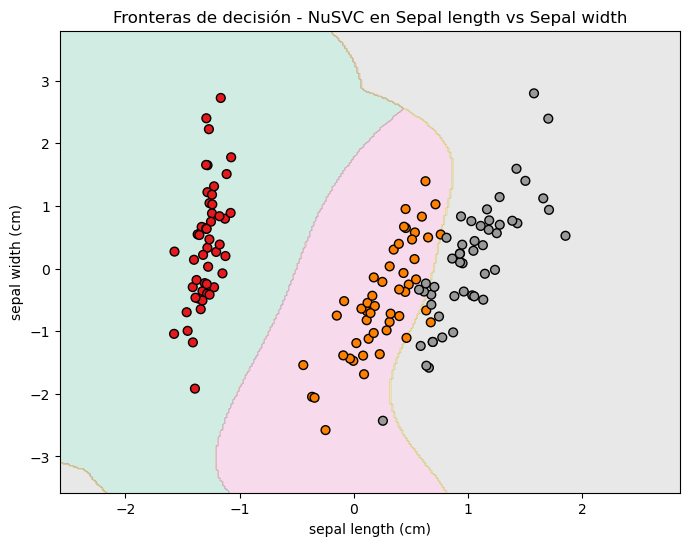

In [21]:
# Importamos las bibliotecas para traer e imprimir el dataset.
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Cargamos el dataset.
iris = load_iris()
X = iris.data
y = iris.target

# Reducimos a 2 dimensiones con PCA para graficar.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Escalado de los datos.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Dividimos los datos en conjuntos de train y test.
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Creamos y entrenamos el modelo NuSVC.
nusvc = NuSVC(nu=0.5, kernel="rbf", gamma="scale", random_state=42)
nusvc.fit(X_train, y_train)

# Creamos una malla para graficar las fronteras de decisión.
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predicciones sobre la malla.
Z = nusvc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Generamos el gráfico.
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k", s=40)
plt.title("Fronteras de decisión - NuSVC en Sepal length vs Sepal width")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()